## Warmup demo for Mercer kernels

This notebook illustrates the functions defined in terms of an RKHS (Reproducing Kernel Hilbert Space). For assignment 1, we will ask you to implement Mercer kernel regression.
The code here can serve as a starting point for this.

We display random functions of the form $f(x) = \sum_{i=1}^n \alpha_i K(x,X_i)$, where 
$K$ is a Gaussian kernel, and the $\alpha_i$s are just random normal random variables. Notice that while Mercer kernel regression works in terms of penalization, the bandwidth parameter in $K$ also affects the smoothness of the functions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep


In [2]:
def random_mercer_kernel_function(X, x, h=.3):
    # Compute the function values on x
    K = np.zeros(len(x)*len(X)).reshape(len(x), len(X))
    for j in np.arange(K.shape[1]):
        K[:,j] = (1/h)*np.exp(-(x-X[j])**2/(2*h**2))
    alpha = np.random.normal(size=K.shape[1])
    f = K @ alpha
    
    # Compute the norm of the function 
    Khat = np.zeros(len(X)*len(X)).reshape(len(X), len(X))
    for j in np.arange(K.shape[1]):
        Khat[:,j] = (1/h)*np.exp(-(X-X[j])**2/(2*h**2))
    norm = alpha.T @ Khat @ alpha
    
    return f, norm

def plot_function(x, f, norm, sleeptime=.01):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    plt.plot(x, f, color='gray', linewidth=2, label='true function')
    plt.title('norm: %.2f' % norm)
    plt.ylim((1.25)*np.min(f), (1.25)*np.max(f))
    plt.show()
    sleep(sleeptime)
    


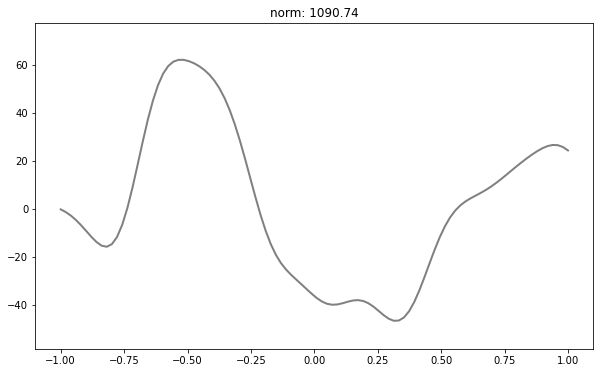

In [3]:
min_x, max_x = -1, 1
x = np.linspace(min_x, max_x, 100)

for i in np.arange(20):
    X = np.sort(np.random.uniform(low=min_x, high=max_x, size=100))
    f, norm = random_mercer_kernel_function(X, x, h=.1)
    plot_function(x, f, norm, sleeptime=1)